In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np

from utils import galactic_distances

In [2]:
# convert ICRS to Galactic coordinates
ra = 197.45
dec = -23.38

c_icrs = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
glong = c_icrs.galactic.l.value
glat = c_icrs.galactic.b.value
print(glong, glat)

308.37916982845246 39.297456726785235


In [3]:
distance = 40 #Mpc
z, h = galactic_distances.galactic_distances(glat, glong, distance)
print(z, 'kpc from Galactic centre')
print(h, 'kpc above Galactic plane')

35.44907735324106 kpc from Galactic centre
32.73665573005778 kpc above Galactic plane


In [4]:
# calculating transient location

# xy plane distance towards transient
lat_rad = np.deg2rad(glat)
dist_z = distance * np.cos(lat_rad)

# longitude complementary angle to angle from galactic centre to transient 
xy_theta = 360 - glong
xy_theta_comp = 90 - xy_theta
xy_theta_comp_rad = np.deg2rad(xy_theta_comp)

# x and y distances to transient
dist_x = dist_z * np.cos(xy_theta_comp_rad)
dist_y = dist_z * np.sin(xy_theta_comp_rad)

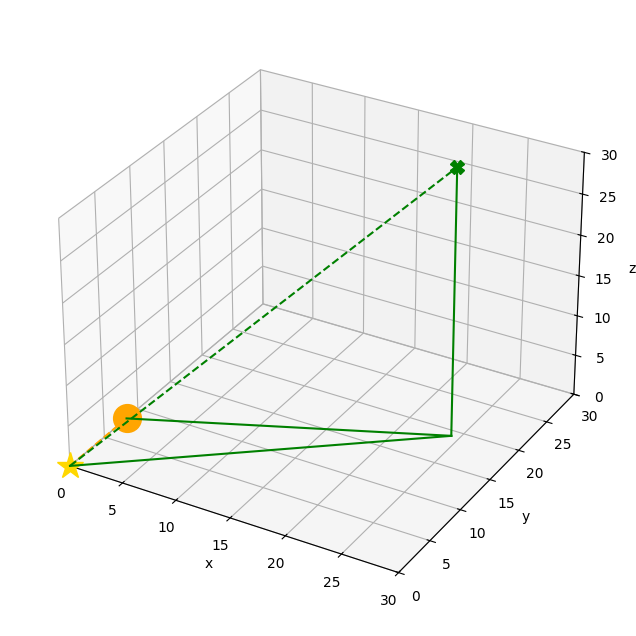

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Sun
plt.plot(0,0,0, marker='*', markersize=20, c='gold')

# Galactic Centre
plt.plot(0,8.3,0, marker='o', markersize=20, c='orange')
plt.plot([0,0], [0,8.3], [0,0,], ls='--', c='orange')

# Transient
plt.plot(dist_x, dist_y, h, marker='X', markersize=10, c='green')
plt.plot([0,dist_x], [0,dist_y], [0,h],ls='--', c='g')

plt.plot([0,dist_x], [0,dist_y], [0,0], ls='-', c='g')
plt.plot([0,dist_x], [8.3,dist_y], [0,0], ls='-', c='g')
plt.plot([dist_x,dist_x], [dist_y,dist_y], [0,h], ls='-', c='g')

ax.set_xlim([0,30])
ax.set_ylim([0,30])
ax.set_zlim([0,30])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_box_aspect(None, zoom=0.95)